In [1]:
## lets download our dataset 
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

--2021-12-29 13:29:40--  https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv [following]
--2021-12-29 13:29:41--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.7’

CreditScoring.csv.7 100%[===================>] 178.21K   279KB/s    in 0.6s    

2021-12-29 13:29:43 (279 KB/s) - ‘CreditScoring.csv.7’ saved [182489/182489]



In [2]:
##lets import our relevant libraries
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
## lets read our data using pandas
df = pd.read_csv("CreditScoring.csv")

## Data cleaning

In [4]:
## lets review some few rows in our dataset
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
## lets lower case all the column names 
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


### Translate all the categorical columns to their actual names

In [6]:
## lets start with status 
## where "1" means "OK"
## "2" means "default"
## "0" means missing 
status_values = {
    1: "ok",
    2: "default",
    0: "unk"
}

## lets use to the dictionary to do the mapping 
df.status = df.status.map(status_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
## lets do same for home
## where "1" means "renting",
## "2" means "homeowner",
## "3" means "owner",
## "4" means "ignore",
## "5" means "parents"
## "6" means "other",
## "0" means "unknown"

home_values = {
    1: "rent",
    2: "owner",
    3: "ignore",
    4: "parents",
    5: "other",
    0: "unk"
}

df.home = df.home.map(home_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,1,1,46,107,0,0,310,910


In [8]:
## lets do same for the marital status columns
marital_values = {
    1: "single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "divorced",
    6: "unk"
}

df.marital = df.marital.map(marital_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,1,1,46,107,0,0,310,910


In [9]:
## lets do same for the job column
job_values = {
    1: "fixed",
    2: "parttime",
    3: "freelance", 
    4: "others",
    5: "unk"
}

df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,1,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,1,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,2,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,1,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,1,fixed,46,107,0,0,310,910


In [10]:
## lets also do same for the records 
records_values = {
    1: "no",
    2: "yes",
    3: "unk"
}

df.records = df.records.map(records_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
## lets check the summary statistics of each column


In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
## lets replace the values with 99999999.9 with NaN
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [14]:
##
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [15]:
## lets also take a look at our target value
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [16]:
## lets remove the unknown value in that column
## by actually creating a new DataFrame 
df = df[df.status != 'unk']

In [17]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [18]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

## Dataset preparation 
- Split the dataset into train, validation, and test
- Handling missing values
- Use one-hot encoding to encode categorical variables 
- Create the feature matrix X and the target variable y

In [19]:
## lets split our data into the following ratios:
## Training data(60% of the original dataset)
## Validation data(20%)
## Test data(20%)

from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)


In [20]:
##
len(df_train), len(df_valid), len(df_test)

(2672, 891, 891)

In [21]:
## lets select our target variable
## by selecting default as our positive class
y_train = (df_train.status == 'default').values
y_valid = (df_valid.status == 'default').values



In [22]:
## lets remove status from the DataFrame
del df_train['status']


In [23]:
del df_valid['status']

In [24]:
## lets check for null values 
df_train.isnull().sum()

seniority      0
home         186
time           0
age            0
marital        1
records        0
job            1
expenses       0
income        25
assets        30
debt          11
amount         0
price          0
dtype: int64

In [25]:
df_valid.isnull().sum()

seniority     0
home         65
time          0
age           0
marital       0
records       0
job           1
expenses      0
income        5
assets        8
debt          3
amount        0
price         0
dtype: int64

In [26]:
## lets work on X, our feature matrix
## lets replace missing valus with zeros
df_train = df_train.fillna(0)
df_valid = df_valid.fillna(0)

### Let's encode our categorical variables 

In [27]:
## lets converts the DataFrames into a dictionary format
dict_train = df_train.to_dict(orient='records')
dict_valid = df_valid.to_dict(orient='records')

In [28]:
## lets now perform DictVectorizer on the list of dictionaries
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(dict_train)

X_train = dv.transform(dict_train)
X_valid = dv.transform(dict_valid)

#X_trian = dv.fit_transform(dict_train)
#X_valid = dv.transform(dict_valid)

In [29]:
#print(len(X_valid[0])), print(len(X_train[0]))

## Decision tree classifier 

In [30]:
from sklearn.tree import DecisionTreeClassifier

## lets create an instance of the classifier
dt = DecisionTreeClassifier()

## lets trian
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### Lets evaluate our model using AUC 

In [31]:
from sklearn.metrics import roc_auc_score

##lets first evaluate the performance on the training set.
##we need scores, not hard predictions for our auc
y_pred_train = dt.predict_proba(X_train)[:,1]

roc_auc_score(y_train, y_pred_train)

1.0

In [32]:
##
y_pred_val = dt.predict_proba(X_valid)[:,1]

## evaluating our model 
roc_auc_score(y_valid, y_pred_val)


0.6584637087985274

#### lets reduce the size of our tree

In [33]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [34]:
## lets visualize the tree we have just trained
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False
|--- records=no >  0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True



In [35]:
y_pred_train = dt.predict_proba(X_train)[:,1]

train_auc = roc_auc_score(y_train, y_pred_train)

print(f"Train auc: {train_auc}")

Train auc: 0.7054989859726213


In [36]:
y_pred_valid = dt.predict_proba(X_valid)[:,1]

valid_auc = roc_auc_score(y_valid, y_pred_valid)

print(f"Valid auc: {valid_auc}")

Valid auc: 0.6685264343319367


### Parameter turning for decision trees 
The processing of finding the best set of parameters is called parameter turning

In [37]:
## lets start by turning the max_depth
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    ##
    y_pred = dt.predict_proba(X_valid)[:, 1]
    ##
    train_acc = roc_auc_score(y_valid, y_pred)
    #print('%4s -> %.3f' % (depth, train_acc))
    print(f"{depth} -> {round(train_acc, 3)}")
    
    

1 -> 0.606
2 -> 0.669
3 -> 0.739
4 -> 0.761
5 -> 0.767
6 -> 0.754
10 -> 0.699
15 -> 0.656
20 -> 0.663
None -> 0.651


In [38]:
## let's also turn min_leaf_size 
for depth in [4,5,6]:
    print(f"depth: {depth}")
    
    for leaf in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        dt.fit(X_train, y_train)
        
        ## predict the accuracy
        y_pred_valid = dt.predict_proba(X_valid)[:, 1]
        
        ##
        valid_auc = roc_auc_score(y_valid, y_pred_valid)
        
        print(f"{leaf} -> {round(valid_auc, 3)}")
        
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.767
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.761
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.77
100 -> 0.776
200 -> 0.768



In [39]:
## let's use our best parameters to train our final model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Random forest 


## Training a random forest

In [40]:
## 
from sklearn.ensemble import RandomForestClassifier

## lets create an instance of the random forest classifier
rf = RandomForestClassifier(n_estimators=10)
## lets train the classifier 
rf.fit(X_train, y_train)

## lets test 
y_pred_valid = rf.predict_proba(X_valid)[:, 1]

valid_auc = roc_auc_score(y_valid, y_pred_valid)

print(f"Validation accuracy: {round(valid_auc, 3)}")

Validation accuracy: 0.808


In [41]:
## 
from sklearn.ensemble import RandomForestClassifier

## lets create an instance of the random forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=3)
## lets train the classifier 
rf.fit(X_train, y_train)

## lets test 
y_pred_valid = rf.predict_proba(X_valid)[:, 1]

valid_auc = roc_auc_score(y_valid, y_pred_valid)

print(f"Validation accuracy: {round(valid_auc, 3)}")

Validation accuracy: 0.779


In [42]:
## lets iterates over different values for trees
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    
    ##
    y_pred_valid = rf.predict_proba(X_valid)[:, 1]
    
    ##
    valid_auc = roc_auc_score(y_valid, y_pred_valid)
    
    print(f"{i} -> {round(valid_auc, 2)}")
    
    ##lets add the auc score to the list of other scores
    aucs.append(valid_auc)

10 -> 0.78
20 -> 0.81
30 -> 0.81
40 -> 0.81
50 -> 0.82
60 -> 0.82
70 -> 0.82
80 -> 0.82
90 -> 0.82
100 -> 0.82
110 -> 0.82
120 -> 0.82
130 -> 0.82
140 -> 0.82
150 -> 0.82
160 -> 0.82
170 -> 0.82
180 -> 0.82
190 -> 0.82
200 -> 0.82


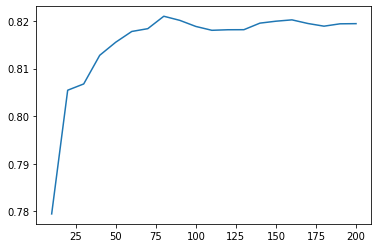

In [43]:
## lets plot a graph depicting our accuracy score
plt.plot(range(10, 201, 10), aucs)

## Parameter tuning for random forest
A random forest ensemble consists of multiple decision trees, so the most important
parameters we need to tune for random forest are the same:
- max_depth
- min_leaf_size

In [44]:
## lets start by tuning the max_depth, and num_estimator

##lets create a dictionary with AUC results
all_aucs = {}

## lets iterates over different depth valus
for depth in [5, 10, 20]:
    ## 
    print(f"depth: {depth}")
    ## creates a list with AUC results for the current depth level
    aucs = []
    
    ## lets iterates over different num_estimator values
    for num_estimator in range(10, 201, 10):
        ## lets train our model
        rf = RandomForestClassifier(n_estimators=num_estimator, max_depth=depth)
        rf.fit(X_train, y_train)
        
        ## lets evaluate our model
        y_pred_valid = rf.predict_proba(X_valid)[:, 1]
        valid_auc = roc_auc_score(y_valid, y_pred_valid)
        
        print(f"{num_estimator} -> {round(valid_auc,2)}")
        aucs.append(valid_auc)
        
    ## lets save AUC for the current depth level in the dictionary   
    all_aucs[depth] = aucs
    print()
        

depth: 5
10 -> 0.8
20 -> 0.8
30 -> 0.81
40 -> 0.81
50 -> 0.8
60 -> 0.8
70 -> 0.81
80 -> 0.8
90 -> 0.81
100 -> 0.8
110 -> 0.81
120 -> 0.81
130 -> 0.81
140 -> 0.81
150 -> 0.81
160 -> 0.81
170 -> 0.81
180 -> 0.81
190 -> 0.81
200 -> 0.81

depth: 10
10 -> 0.81
20 -> 0.81
30 -> 0.81
40 -> 0.82
50 -> 0.82
60 -> 0.82
70 -> 0.82
80 -> 0.83
90 -> 0.82
100 -> 0.82
110 -> 0.81
120 -> 0.82
130 -> 0.82
140 -> 0.82
150 -> 0.82
160 -> 0.82
170 -> 0.82
180 -> 0.82
190 -> 0.82
200 -> 0.82

depth: 20
10 -> 0.78
20 -> 0.81
30 -> 0.81
40 -> 0.82
50 -> 0.8
60 -> 0.81
70 -> 0.81
80 -> 0.81
90 -> 0.83
100 -> 0.82
110 -> 0.81
120 -> 0.82
130 -> 0.82
140 -> 0.82
150 -> 0.82
160 -> 0.82
170 -> 0.82
180 -> 0.82
190 -> 0.82
200 -> 0.81



In [45]:
## lets print out all the
all_aucs

{5: [0.799033082269744,
  0.7982641495725461,
  0.8095287108570876,
  0.8053752633745853,
  0.8045609212661354,
  0.800831294955317,
  0.8081149645201133,
  0.8035074229250927,
  0.8067103000653896,
  0.8040583904482819,
  0.8063167518345402,
  0.8097557579133468,
  0.8077759075827663,
  0.8061351141895328,
  0.8061835508948683,
  0.8076366520549273,
  0.8070614661790706,
  0.8070069748855684,
  0.8085993315734665,
  0.8068253372405609],
 10: [0.811024194134315,
  0.8139727785716016,
  0.8111543677799037,
  0.8174329757089923,
  0.820993073551137,
  0.822942650940883,
  0.8213079121358166,
  0.8255582330289893,
  0.8195036448620764,
  0.8228397229420453,
  0.8135217117531666,
  0.8218043883655033,
  0.8222766462425225,
  0.8243049332784385,
  0.8187952580465476,
  0.8226217577680366,
  0.8199274660337603,
  0.8233725267007338,
  0.8215440410743262,
  0.8235238914049066],
 20: [0.7847624179603303,
  0.8063046426582064,
  0.8064317890097115,
  0.815316897144656,
  0.8036042963357632,
  0

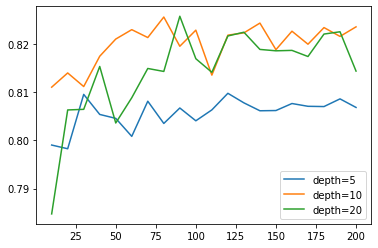

In [46]:
##lets plot our graph of all the accuracies
num_trees = list(range(10, 201, 10))

##
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

In [47]:
## lets start by tuning the m, and num_estimator

##lets create a dictionary with AUC results
all_aucs = {}

## lets iterates over different depth valus
for leaf in [3, 5, 10]:
    ## 
    print(f"min_samples_leaf: {leaf}")
    ## creates a list with AUC results for the current depth level
    aucs = []
    
    ## lets iterates over different num_estimator values
    for num_estimator in range(10, 201, 10):
        ## lets train our model
        rf = RandomForestClassifier(n_estimators=num_estimator, max_depth=10, min_samples_leaf=leaf)
        rf.fit(X_train, y_train)
        
        ## lets evaluate our model
        y_pred_valid = rf.predict_proba(X_valid)[:, 1]
        valid_auc = roc_auc_score(y_valid, y_pred_valid)
        
        print(f"{num_estimator} -> {round(valid_auc,2)}")
        aucs.append(valid_auc)
        
    ## lets save AUC for the current depth level in the dictionary   
    all_aucs[leaf] = aucs
    print()


min_samples_leaf: 3
10 -> 0.8
20 -> 0.81
30 -> 0.82
40 -> 0.82
50 -> 0.82
60 -> 0.82
70 -> 0.82
80 -> 0.82
90 -> 0.82
100 -> 0.82
110 -> 0.82
120 -> 0.82
130 -> 0.82
140 -> 0.82
150 -> 0.83
160 -> 0.83
170 -> 0.83
180 -> 0.82
190 -> 0.82
200 -> 0.82

min_samples_leaf: 5
10 -> 0.8
20 -> 0.81
30 -> 0.82
40 -> 0.82
50 -> 0.82
60 -> 0.82
70 -> 0.82
80 -> 0.82
90 -> 0.82
100 -> 0.82
110 -> 0.82
120 -> 0.83
130 -> 0.82
140 -> 0.82
150 -> 0.82
160 -> 0.82
170 -> 0.83
180 -> 0.82
190 -> 0.82
200 -> 0.82

min_samples_leaf: 10
10 -> 0.81
20 -> 0.81
30 -> 0.81
40 -> 0.82
50 -> 0.82
60 -> 0.82
70 -> 0.82
80 -> 0.82
90 -> 0.82
100 -> 0.82
110 -> 0.82
120 -> 0.82
130 -> 0.82
140 -> 0.82
150 -> 0.82
160 -> 0.82
170 -> 0.82
180 -> 0.82
190 -> 0.82
200 -> 0.82



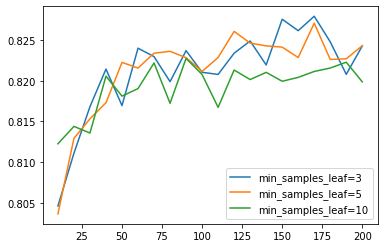

In [48]:
## let's plot a graph of all the 
num_tress = list(range(10, 201, 20))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()

In [49]:
##lets train our final model using the followng paramters
## max_depth = 10
## min_samples_leaf = 5
## n_estimators = 200

rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200)

## Gradient boosting 
we can train models sequentially — each next model tries to fix
errors from the previous one:
- Train the first model.
- Look at the errors it makes.
- Train another model that fixes these errors.
- Look at the errors again; repeat sequentially.
This way of combining models is called boosting. Gradient boosting is a particular variation of this approach that works especially well with trees 

### XGBoost: Extreme gradient boosting
There are various good implementations of the gradient boosting model: GradientBoostingClassifier from Scikit-learn, XGBoost, LightGBM and CatBoost. In this
chapter, we use XGBoost (short for “Extreme Gradient Boosting”), which is the most
popular implementation

Before we can train an XGBoost model, we need to wrap our data into DMatrix — a
special data structure for finding splits efficiently. 

When creating an instance of DMatrix, we pass three parameters:
- X_train: the feature matrix
- y_train: the target variable
- feature_names: the names of features in X_train


In [50]:
##lets import our library
import xgboost as xgb 

In [51]:
##lets wrap our train data around a DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)

##lets wrap our train data around a DMatrix
dvalid = xgb.DMatrix(X_valid, label=y_valid, feature_names=dv.feature_names_)


In [52]:
## lets specify our parameters for training. 
xgb_params = {
    'eta': 0.2,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [53]:
##lets train our XGBoost model
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[13:30:52] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:30:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
## lets make our predictions
y_pred_valid = model.predict(dvalid)

## The result, y_pred, is a one-dimensional NumPy array with predictions: the risk score
## for each customer in the validation dataset 

y_pred_valid[:10]

array([0.10442939, 0.12037092, 0.16982481, 0.20109239, 0.14972354,
       0.14424479, 0.13101916, 0.5753774 , 0.30963093, 0.07440975],
      dtype=float32)

In [55]:
## lets cal the AUC 
roc_auc_score(y_valid, y_pred_valid)

0.807031193238236

### Model performance monitoring

To get an idea of how AUC changes as the number of trees grows, we can use a watchlist
— a built-in feature in XGBoost for monitoring model performance.
A watchlist is a Python list with tuples. Each tuple contains a DMatrix and its name.
This is how we typically do it

To use the watchlist during training, we need to specify two extra arguments for the
train function:
- evals: the watchlist.
- verbose_eval: how often we print the metric. If we set it to “10,” we see the
result after each 10th step

In [56]:
## lets create our watchlist 
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [57]:
## lets modify the list of parameters for taining
## to specigy the metric we use for evaluation

## lets specify our parameters for training. 
xgb_params = {
    'eta': 0.2,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}


In [58]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

[13:30:53] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.86300	valid-auc:0.76818
[10]	train-auc:0.93906	valid-auc:0.80932
[20]	train-auc:0.96179	valid-auc:0.81519
[30]	train-auc:0.97707	valid-auc:0.81885
[40]	train-auc:0.98566	valid-auc:0.81358
[50]	train-auc:0.98994	valid-auc:0.81432
[60]	train-auc:0.99394	valid-auc:0.81473
[70]	train-auc:0.99638	valid-auc:0.81343
[80]	train-auc:0.99764	valid-auc:0.81194
[90]	train-auc:0.99890	valid-auc:0.81144
[99]	train-auc:0.99939	valid-auc:0.81039


### Parameter turning for XGBoost

These parameters control the
training process:
- eta: Learning rate. Decision trees and random forest don’t have this parameter.
We cover it later in this section when we tune it.
- max_depth: The maximum allowed depth of each tree; the same as max_depth
in DecisionTreeClassifier from Scikit-learn.
- min_child_weight: The minimal number of observations in each group; the
same as min_leaf_size in DecisionTreeClassifier from Scikit-learn.
Other parameters:
- objective: The type of task we want to solve. For classification, it should be
binary:logistic.
- eval_metric: The metric we use for evaluation. For this project, it’s “AUC.”
- nthread: The number of threads we use for training the model. XGBoost is very
good at parallelizing training, so set it to the number of cores your computer has.
- seed: The seed for the random-number generator; we need to set it to make
sure the results are reproducible.
- silent: The verbosity of the output. When we set it to “1,” it outputs only warnings.

In [59]:
## let change the learning rate (eta)
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
    
}

In [60]:
## lets train our model
model = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[13:30:54] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.86300	valid-auc:0.76818
[10]	train-auc:0.91549	valid-auc:0.79972
[20]	train-auc:0.93924	valid-auc:0.80740
[30]	train-auc:0.95271	valid-auc:0.81570
[40]	train-auc:0.96298	valid-auc:0.82041
[50]	train-auc:0.96947	valid-auc:0.82447
[60]	train-auc:0.97616	valid-auc:0.82427
[70]	train-auc:0.98097	valid-auc:0.82372
[80]	train-auc:0.98495	valid-auc:0.82534
[90]	train-auc:0.98778	valid-auc:0.82524
[100]	train-auc:0.99058	valid-auc:0.82460
[110]	train-auc:0.99272	valid-auc:0.82361
[120]	train-auc:0.99413	valid-auc:0.82249
[130]	train-auc:0.99509	valid-auc:0.82216
[140]	train-auc:0.99587	valid-auc:0.82097
[150]	train-auc:0.99672	

In [61]:
## let change the learning rate (eta)
xgb_params = {
    'eta': 0.5,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
    
}

In [62]:
## lets train our model
model = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[13:31:01] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.86300	valid-auc:0.76818
[10]	train-auc:0.97185	valid-auc:0.81318
[20]	train-auc:0.98572	valid-auc:0.80947
[30]	train-auc:0.99750	valid-auc:0.81163
[40]	train-auc:0.99926	valid-auc:0.81321
[50]	train-auc:0.99996	valid-auc:0.80975
[60]	train-auc:1.00000	valid-auc:0.80766
[70]	train-auc:1.00000	valid-auc:0.80507
[80]	train-auc:1.00000	valid-auc:0.80497
[90]	train-auc:1.00000	valid-auc:0.80448
[100]	train-auc:1.00000	valid-auc:0.80613
[110]	train-auc:1.00000	valid-auc:0.80400
[120]	train-auc:1.00000	valid-auc:0.80354
[130]	train-auc:1.00000	valid-auc:0.80615
[140]	train-auc:1.00000	valid-auc:0.80503
[150]	train-auc:1.00000	

### Tuning Other Parameters 

In [63]:
## let change the max_depth
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
    
}
## we a max_depth b/n 3 and 6 (where 4 is the optimal)

In [64]:
## lets train our model
model = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[13:31:10] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.77424	valid-auc:0.73571
[10]	train-auc:0.84733	valid-auc:0.78964
[20]	train-auc:0.86359	valid-auc:0.80617
[30]	train-auc:0.87855	valid-auc:0.81478
[40]	train-auc:0.88701	valid-auc:0.81990
[50]	train-auc:0.89458	valid-auc:0.82595
[60]	train-auc:0.90159	valid-auc:0.82807
[70]	train-auc:0.90650	valid-auc:0.82801
[80]	train-auc:0.91110	valid-auc:0.82940
[90]	train-auc:0.91428	valid-auc:0.82997
[100]	train-auc:0.91787	valid-auc:0.83162
[110]	train-auc:0.92157	valid-auc:0.83177
[120]	train-auc:0.92442	valid-auc:0.83256
[130]	train-auc:0.92697	valid-auc:0.83244
[140]	train-auc:0.92927	valid-auc:0.83274
[150]	train-auc:0.93235	

### Testing the final model

We’re almost ready to use it for risk scoring. We still need to do two things before we
can use it:

- Retrain the final model on both train and validation datasets combined. We no longer need the validation dataset, so we can use more data for training, which will make the model slightly better.

- Test the model on the test set. This is the part of data we kept aside from the beginning. Now we use it to make sure the model didn’t overfit and performs well on completely unseen data.

The next steps are:
- Apply the same preprocessing to df_full_train and df_test as we did to df_train and df_val. As a result, we get the feature matrices X_train and X_test as well as our target variables y_train and y_test.
- Train a model on the combined dataset with the parameters we selected previously.
- Apply the model to the test data to get the test predictions.
- Verify that the model performs well and doesn’t overfit

In [65]:
## lets create our target variable 
y_train = (df_train_full.status == 'default').values 
y_test = (df_test.status == 'default').values

In [66]:
## lets remove the target variable
del df_train_full['status']
del df_test['status']

In [67]:
## lets convert our dataframe into a list of dictionary and 
## and then use one-hot econding to the feature matrix

df_train_full_dict = df_train_full.fillna(0).to_dict(orient='records')
df_test_dict = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(df_test_dict)

DictVectorizer(sparse=False)

In [68]:
X_train = dv.transform(df_train_full_dict)
X_test = dv.transform(df_test_dict)

In [71]:
## we train our data using this data and the optimal paramaters we determined previously 

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

## let change the max_depth
xgb_params = {
    
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
    
}



In [74]:
## lets train our model
num_trees = 190 
model = xgb.train(xgb_params, dtrain, num_boost_round= num_trees)
## lets create our watchlist 
# = [(dtrain, 'train'), (dtest, 'test')]
## lets train our model
# = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[04:36:39] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [75]:
y_pred_xgb_test = model.predict(dtest)

roc_auc_score(y_test, y_pred_xgb_test)

0.834239528859782